# Семинар 2.

## Метод моментов. Оценка параметров распределения по методу моментов

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


### Идея

Метод моментов основан на приравнивании выборочных моментов к теоретическим моментам распределения.
Предположим, что случайная величина $X$ имеет параметры $\theta_1$, $\theta_2$, $\cdots$, тогда теоретические начальные моменты распределения вычисляются как:

$$
m_k = \mathbb{E}[X^k]
$$

Есть также центральные моменты, которые измеряют распределение значений случайной величины относительно ее среднего значения.

$$
\gamma_k = \mathbb{E}[X - \mathbb{E} X]^k
$$

При этом само математическое ожидание естественно будет зависеть от параметров распределения.
В качестве примера возьмем нормальное распределение с параметрами $X ∼ N(\mu, \sigma^2)$.

Мы можем выразить начальные моменты через центральные моменты, используя формулу разложения степеней:

$$
X^k = ((X - \mu) + \mu)^k
$$

#### Первый момент
$$
m_1 = \mathbb{E}[X] = \mu
$$

#### Второй момент
$$
m_2 = \mathbb{E}[X^2] = \mathbb{E}[(X - \mu + \mu)^2] = \mathbb{E}[(X - \mu)^2) - 2 \mu \mathbb{E}[(X - \mu)) + \mu^2 = \sigma^2 + 0 + \mu^2
$$

#### Оценка параметров
Так как истинных параметров распределения мы не знаем, нам остается только оценивать их по выборке:
$$
\hat{m_k} =\frac{1}{n} \sum_{i=1}^{n}  X_{i}^k
$$

Так получаются оценки параметров:

##### Математическое ожидание

$$
\hat{\mu} = \hat{m_1} = \frac{1}{n} \sum_{i=1}^{n}  X_{i}
$$

##### Дисперсия

$$
\hat{\sigma^2} = \hat{m_2} - \hat{m_1}^2 = \frac{1}{n} \sum_{i=1}^{n}  X_{i}^2 - \hat{\mu}^2
$$



In [56]:
def moment_estimation_normal(sample):
    mu_hat = np.mean(sample)
    sigma_hat = np.sqrt(np.mean(sample**2) - mu_hat**2)
    return mu_hat, sigma_hat

# Размер выборки
n = 10000

# ВНИМАНИЕ: Здесь параметр scale не дисперсия, а стандартное отклонение, поэтому от sigma_hat берем корень
normal_sample = np.random.normal(loc=5, scale=2, size=n)

# Оценка параметров
mu_hat, sigma_hat = moment_estimation_normal(normal_sample)

# Вывод результатов
print(f'Оценка параметров нормального распределения: mu={mu_hat:.2f}, sigma={sigma_hat:.2f}')

Оценка параметров нормального распределения: mu=4.97, sigma=1.99


Вспомним, что мы также говорили про равномерное распределение. У него:

$\hat{\mathbb{E}[X]} = \frac{a+b}{2}$

$\hat{\mathbb{D}[X]} = \frac{(b-a)^2}{12}$

Выражая параметры получим:

$ \hat{a}= \hat{\mathbb{E}[X]} - \sqrt {3 \hat{\mathbb{D}[X]}} $


$ \hat{b}= \hat{\mathbb{E}[X]} + \sqrt {3 \hat{\mathbb{D}[X]}} $

In [57]:
def moment_estimation_uniform(sample):
    mu_hat = np.mean(sample)
    sigma2_hat = np.mean(sample**2) - mu_hat**2

    a_hat = mu_hat - np.sqrt(3 * sigma2_hat)
    b_hat = mu_hat + np.sqrt(3 * sigma2_hat)

    return a_hat, b_hat


uniform_sample = np.random.uniform(low=2, high=10, size=n)
a_hat, b_hat = moment_estimation_uniform(uniform_sample)

print(f'Оценка параметров равномерного распределения: a={a_hat:.2f}, b={b_hat:.2f}')

Оценка параметров равномерного распределения: a=1.95, b=9.99


Поговорим о нескольких свойствах оценок

#### Несмещенность
Оценка $\hat{\theta}$ параметра $\theta$ называется несмещенной, если ее математическое ожидание совпадает с истинным значением параметра.

##### Смысл
В среднем оценка не завышает и не занижает истинный параметр

$\mathbb{E}[\hat{\theta}] = \theta$

#### Состоятельность
Оценка $\hat{\theta_n}$ параметра $\theta$ называется состоятельной, если она сходится по вероятности к истинному значению параметра при увеличении объема выборки.

##### Смысл
Чем больше выборка, тем точнее становится оценка

$\hat{\theta_n} \overset{p}{\to} \theta$

In [58]:
# Разные размеры выборок
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
# Количество генераций выборок
num_experiments = 10000

# Истинные параметры
true_mu, true_sigma = 5, 2  # Для нормального распределения
true_a, true_b = 2, 10  # Для равномерного распределения

# Хранение средних оценок и дисперсий для анализа
mu_means, sigma_means = [], []
mu_vars, sigma_vars = [], []

a_means, b_means = [], []
a_vars, b_vars = [], []

# Запуск экспериментов для разных n
for n in sample_sizes:
    mu_estimates, sigma_estimates = [], []
    a_estimates, b_estimates = [], []

    for _ in range(num_experiments):
        # Генерация выборок
        normal_sample = np.random.normal(loc=true_mu, scale=true_sigma, size=n)
        uniform_sample = np.random.uniform(low=true_a, high=true_b, size=n)

        # Оценка параметров
        mu_hat, sigma_hat = moment_estimation_normal(normal_sample)
        a_hat, b_hat = moment_estimation_uniform(uniform_sample)

        # Сохранение результатов
        mu_estimates.append(mu_hat)
        sigma_estimates.append(sigma_hat)
        a_estimates.append(a_hat)
        b_estimates.append(b_hat)

    # Записываем средние значения (несмещенность)
    mu_means.append(np.mean(mu_estimates))
    sigma_means.append(np.mean(sigma_estimates))
    a_means.append(np.mean(a_estimates))
    b_means.append(np.mean(b_estimates))

    # Записываем дисперсии (состоятельность)
    mu_vars.append(np.var(mu_estimates))
    sigma_vars.append(np.var(sigma_estimates))
    a_vars.append(np.var(a_estimates))
    b_vars.append(np.var(b_estimates))

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Графики несмещенности
axes[0, 0].plot(sample_sizes, mu_means, 'o-', label=r'$\hat{\mu}$')
axes[0, 0].axhline(true_mu, color='r', linestyle='--', label=r'$\mu=5$')
axes[0, 0].set_title("Несмещенность оценки $\mu$ (нормальное распределение)")
axes[0, 0].set_xlabel("Размер выборки")
axes[0, 0].set_ylabel("Оценка $\mu$")
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(sample_sizes, sigma_means, 'o-', label=r'$\hat{\sigma}$')
axes[0, 1].axhline(true_sigma, color='r', linestyle='--', label=r'$\sigma=2$')
axes[0, 1].set_title("Несмещенность оценки $\sigma$ (нормальное распределение)")
axes[0, 1].set_xlabel("Размер выборки")
axes[0, 1].set_ylabel("Оценка $\sigma$")
axes[0, 1].legend()
axes[0, 1].grid()

# Графики состоятельности
axes[1, 0].plot(sample_sizes, mu_vars, 'o-', label=r'Var($\hat{\mu}$)')
axes[1, 0].set_title("Состоятельность оценки $\mu$ (нормальное распределение)")
axes[1, 0].set_xlabel("Размер выборки")
axes[1, 0].set_ylabel("Дисперсия оценки $\mu$")
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].plot(sample_sizes, sigma_vars, 'o-', label=r'Var($\hat{\sigma}$)')
axes[1, 1].set_title("Состоятельность оценки $\sigma$ (нормальное распределение)")
axes[1, 1].set_xlabel("Размер выборки")
axes[1, 1].set_ylabel("Дисперсия оценки $\sigma$")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()

# Визуализация для равномерного распределения
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Графики несмещенности
axes[0, 0].plot(sample_sizes, a_means, 'o-', label=r'$\hat{a}$')
axes[0, 0].axhline(true_a, color='r', linestyle='--', label=r'$a=2$')
axes[0, 0].set_title("Несмещенность оценки $a$ (равномерное распределение)")
axes[0, 0].set_xlabel("Размер выборки")
axes[0, 0].set_ylabel("Оценка $a$")
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(sample_sizes, b_means, 'o-', label=r'$\hat{b}$')
axes[0, 1].axhline(true_b, color='r', linestyle='--', label=r'$b=10$')
axes[0, 1].set_title("Несмещенность оценки $b$ (равномерное распределение)")
axes[0, 1].set_xlabel("Размер выборки")
axes[0, 1].set_ylabel("Оценка $b$")
axes[0, 1].legend()
axes[0, 1].grid()

# Графики состоятельности
axes[1, 0].plot(sample_sizes, a_vars, 'o-', label=r'Var($\hat{a}$)')
axes[1, 0].set_title("Состоятельность оценки $a$ (равномерное распределение)")
axes[1, 0].set_xlabel("Размер выборки")
axes[1, 0].set_ylabel("Дисперсия оценки $a$")
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].plot(sample_sizes, b_vars, 'o-', label=r'Var($\hat{b}$)')
axes[1, 1].set_title("Состоятельность оценки $b$ (равномерное распределение)")
axes[1, 1].set_xlabel("Размер выборки")
axes[1, 1].set_ylabel("Дисперсия оценки $b$")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()

Font 'nonuniit' does not have a glyph for '\\mu' [U+e1e3], substituting with a dummy symbol.


AttributeError: 'NoneType' object has no attribute 'family_name'

Font 'nonuniit' does not have a glyph for '\\mu' [U+e1e3], substituting with a dummy symbol.


Error in callback <function _draw_all_if_interactive at 0x110504720> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'NoneType' object has no attribute 'family_name'

Font 'nonuniit' does not have a glyph for '\\mu' [U+e1e3], substituting with a dummy symbol.


AttributeError: 'NoneType' object has no attribute 'family_name'

<Figure size 1200x1000 with 4 Axes>

In [32]:
sigma_means

[np.float64(1.8411838652762835),
 np.float64(1.9714003971718916),
 np.float64(1.9842223877816716),
 np.float64(1.9957452046569921),
 np.float64(1.9977068510604425),
 np.float64(1.999651801260944),
 np.float64(1.999887777561905)]

In [52]:
def moment_estimation_normal(sample):
    mu_hat = np.mean(sample)
    sigma_hat = np.sqrt((1/(n-1))*n*np.mean(sample**2) - mu_hat**2)
    return mu_hat, sigma_hat

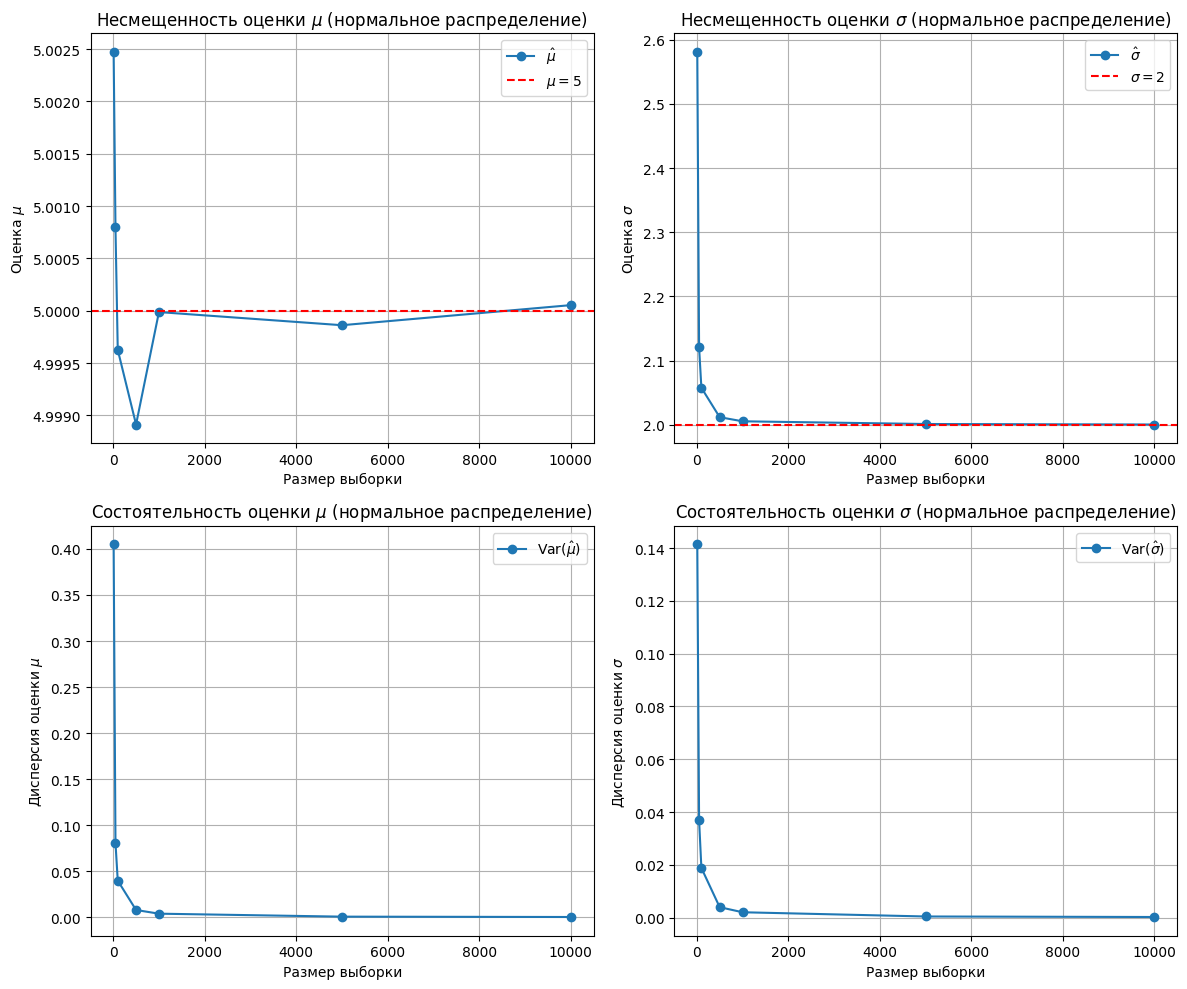

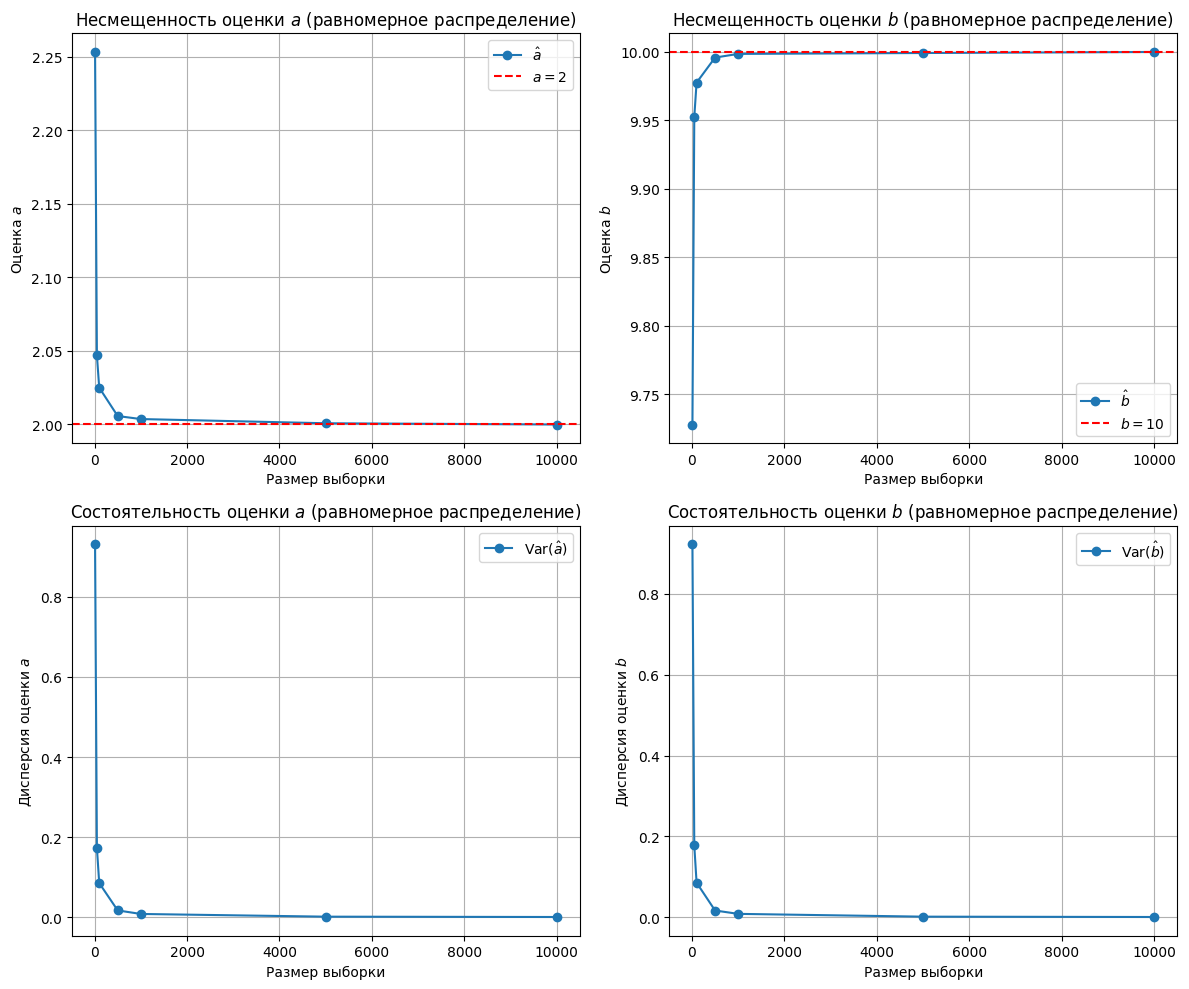

In [53]:
# Разные размеры выборок
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
num_experiments = 10000  # Количество экспериментов для усреднения

# Истинные параметры
true_mu, true_sigma = 5, 2  # Для нормального распределения
true_a, true_b = 2, 10  # Для равномерного распределения

# Хранение средних оценок и дисперсий для анализа
mu_means, sigma_means = [], []
mu_vars, sigma_vars = [], []

a_means, b_means = [], []
a_vars, b_vars = [], []

# Запуск экспериментов для разных n
for n in sample_sizes:
    mu_estimates, sigma_estimates = [], []
    a_estimates, b_estimates = [], []

    for _ in range(num_experiments):
        # Генерация выборок
        normal_sample = np.random.normal(loc=true_mu, scale=true_sigma, size=n)
        uniform_sample = np.random.uniform(low=true_a, high=true_b, size=n)

        # Оценка параметров
        mu_hat, sigma_hat = moment_estimation_normal(normal_sample)
        a_hat, b_hat = moment_estimation_uniform(uniform_sample)

        # Сохранение результатов
        mu_estimates.append(mu_hat)
        sigma_estimates.append(sigma_hat)
        a_estimates.append(a_hat)
        b_estimates.append(b_hat)

    # Записываем средние значения (несмещенность)
    mu_means.append(np.mean(mu_estimates))
    sigma_means.append(np.mean(sigma_estimates))
    a_means.append(np.mean(a_estimates))
    b_means.append(np.mean(b_estimates))

    # Записываем дисперсии (состоятельность)
    mu_vars.append(np.var(mu_estimates))
    sigma_vars.append(np.var(sigma_estimates))
    a_vars.append(np.var(a_estimates))
    b_vars.append(np.var(b_estimates))

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Графики несмещенности
axes[0, 0].plot(sample_sizes, mu_means, 'o-', label=r'$\hat{\mu}$')
axes[0, 0].axhline(true_mu, color='r', linestyle='--', label=r'$\mu=5$')
axes[0, 0].set_title("Несмещенность оценки $\mu$ (нормальное распределение)")
axes[0, 0].set_xlabel("Размер выборки")
axes[0, 0].set_ylabel("Оценка $\mu$")
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(sample_sizes, sigma_means, 'o-', label=r'$\hat{\sigma}$')
axes[0, 1].axhline(true_sigma, color='r', linestyle='--', label=r'$\sigma=2$')
axes[0, 1].set_title("Несмещенность оценки $\sigma$ (нормальное распределение)")
axes[0, 1].set_xlabel("Размер выборки")
axes[0, 1].set_ylabel("Оценка $\sigma$")
axes[0, 1].legend()
axes[0, 1].grid()

# Графики состоятельности
axes[1, 0].plot(sample_sizes, mu_vars, 'o-', label=r'Var($\hat{\mu}$)')
axes[1, 0].set_title("Состоятельность оценки $\mu$ (нормальное распределение)")
axes[1, 0].set_xlabel("Размер выборки")
axes[1, 0].set_ylabel("Дисперсия оценки $\mu$")
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].plot(sample_sizes, sigma_vars, 'o-', label=r'Var($\hat{\sigma}$)')
axes[1, 1].set_title("Состоятельность оценки $\sigma$ (нормальное распределение)")
axes[1, 1].set_xlabel("Размер выборки")
axes[1, 1].set_ylabel("Дисперсия оценки $\sigma$")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()

# Визуализация для равномерного распределения
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Графики несмещенности
axes[0, 0].plot(sample_sizes, a_means, 'o-', label=r'$\hat{a}$')
axes[0, 0].axhline(true_a, color='r', linestyle='--', label=r'$a=2$')
axes[0, 0].set_title("Несмещенность оценки $a$ (равномерное распределение)")
axes[0, 0].set_xlabel("Размер выборки")
axes[0, 0].set_ylabel("Оценка $a$")
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(sample_sizes, b_means, 'o-', label=r'$\hat{b}$')
axes[0, 1].axhline(true_b, color='r', linestyle='--', label=r'$b=10$')
axes[0, 1].set_title("Несмещенность оценки $b$ (равномерное распределение)")
axes[0, 1].set_xlabel("Размер выборки")
axes[0, 1].set_ylabel("Оценка $b$")
axes[0, 1].legend()
axes[0, 1].grid()

# Графики состоятельности
axes[1, 0].plot(sample_sizes, a_vars, 'o-', label=r'Var($\hat{a}$)')
axes[1, 0].set_title("Состоятельность оценки $a$ (равномерное распределение)")
axes[1, 0].set_xlabel("Размер выборки")
axes[1, 0].set_ylabel("Дисперсия оценки $a$")
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].plot(sample_sizes, b_vars, 'o-', label=r'Var($\hat{b}$)')
axes[1, 1].set_title("Состоятельность оценки $b$ (равномерное распределение)")
axes[1, 1].set_xlabel("Размер выборки")
axes[1, 1].set_ylabel("Дисперсия оценки $b$")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()

In [37]:
sigma_means

[np.float64(2.5812378970877226),
 np.float64(2.1173676282843763),
 np.float64(2.059378328464496),
 np.float64(2.011076740954896),
 np.float64(2.0059637465620077),
 np.float64(2.001066202653865),
 np.float64(2.0005357707881384)]

   Height  Weight  Age  Sex  Race
1    67.8     166  210    0     1
2    63.0      93  144    1     0
3    50.1      54  119    0     0
4    55.7      69  130    1     0
5    63.2     115  157    0     0


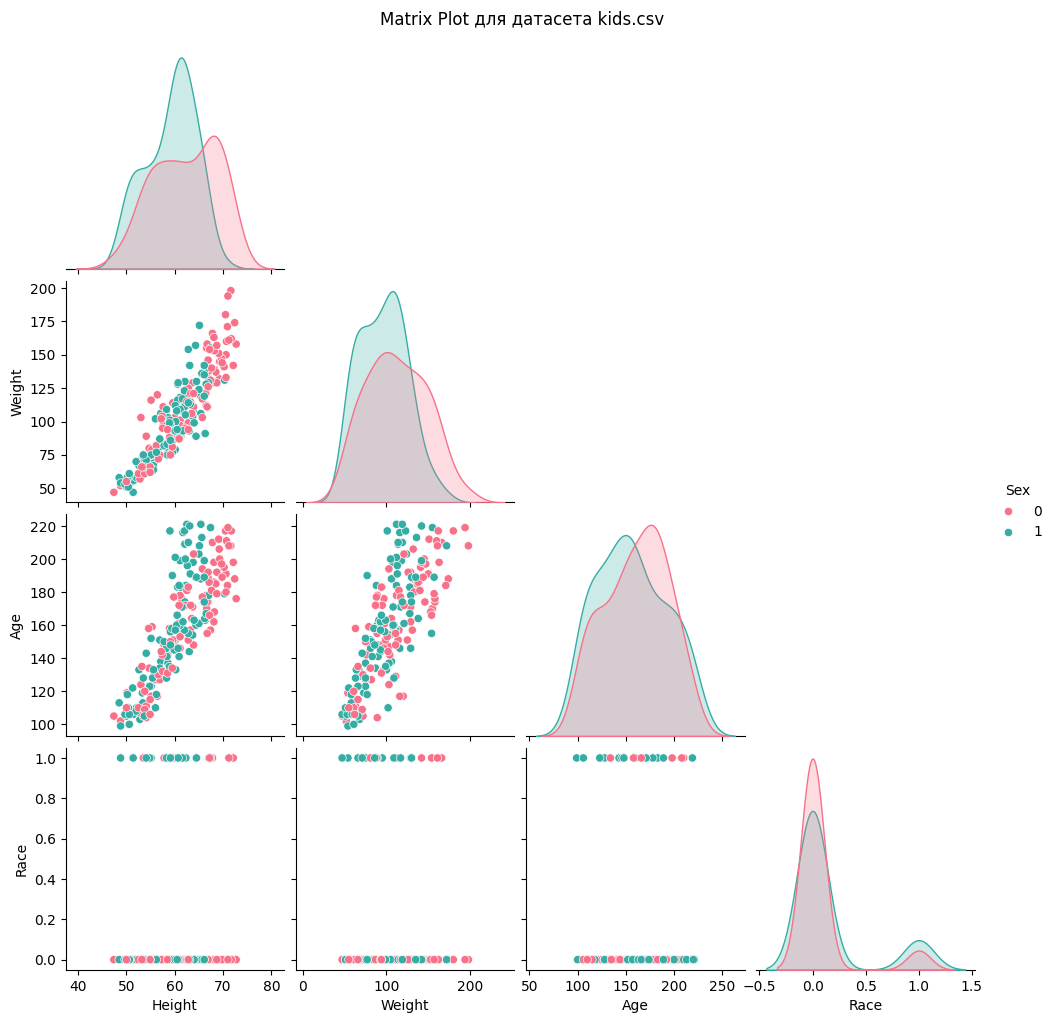

In [44]:
# Загрузка данных
data = pd.read_csv('Kids198.csv', index_col=0)

# Вывод первых строк для проверки
print(data.head())

# Построение матрицы рассеяния
sns.pairplot(data, diag_kind='kde', corner=True, hue='Sex', palette='husl')

plt.suptitle('Matrix Plot для датасета kids.csv', y=1.02)
plt.show()

In [43]:
# Оценка параметров для каждого признака
for feature in ['Height', 'Weight', 'Age']:
    mu, sigma = moment_estimation_normal(data[feature])
    print(f"{feature}: mu={mu:.2f}, sigma={sigma:.2f}")


Height: mu=60.69, sigma=6.07
Weight: mu=104.01, sigma=32.99
Age: mu=158.38, sigma=33.76


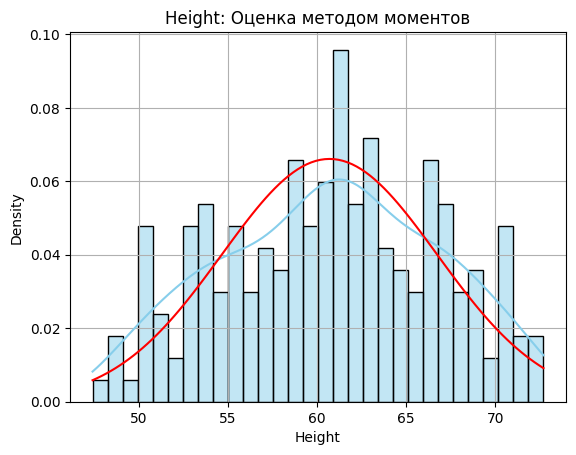

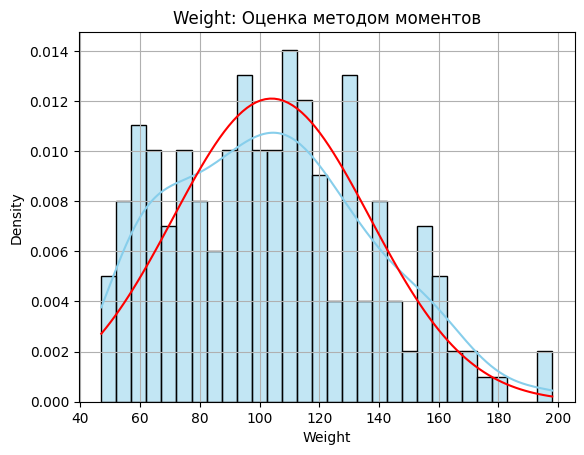

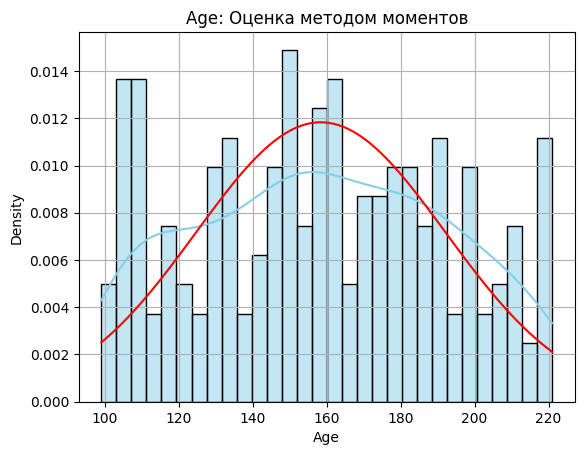

In [41]:
# Построим гистограммы с наложением нормального распределения
for feature in ['Height', 'Weight', 'Age']:
    mu, sigma = moment_estimation_normal(data[feature])
    sns.histplot(data[feature], bins=30, kde=True, color='skyblue', stat='density')

    # Теоретическая плотность нормального распределения
    x = np.linspace(data[feature].min(), data[feature].max(), 100)
    plt.plot(x, (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(x - mu)**2 / (2*sigma**2)), color='red')

    plt.title(f'{feature}: Оценка методом моментов')
    plt.grid()
    plt.show()


# Поговорим про централизацию и стандартизацию

In [46]:
# Централизация
centralized_data = data[['Height', 'Weight', 'Age']] - data[['Height', 'Weight', 'Age']].mean()

In [47]:
# Стандартизация через StandardScaler
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data[['Height', 'Weight', 'Age']]), columns=['Height', 'Weight', 'Age'])


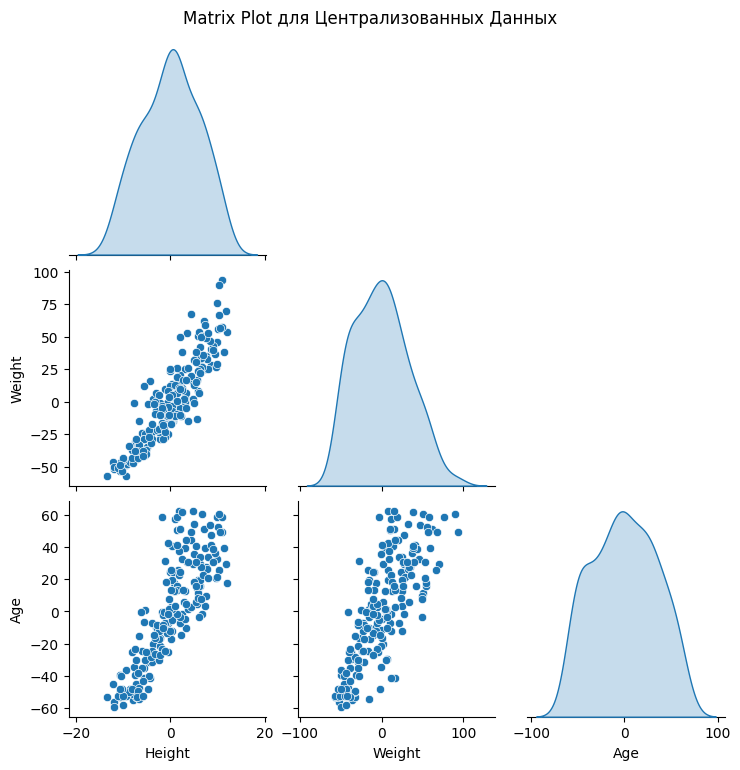

In [48]:
# Централизованные данные
sns.pairplot(centralized_data, diag_kind='kde', corner=True)
plt.suptitle('Matrix Plot для Централизованных Данных', y=1.02)
plt.show()

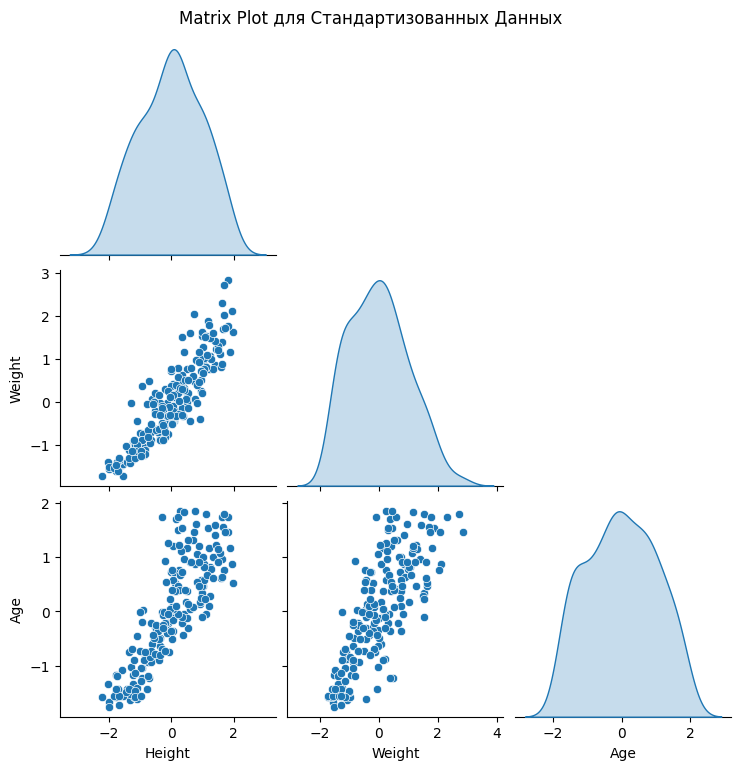

In [50]:
# Стандартизованные данные
sns.pairplot(standardized_data, diag_kind='kde', corner=True)
plt.suptitle('Matrix Plot для Стандартизованных Данных', y=1.02)
plt.show()